In [1]:
import spacy
nlp = spacy.load("en_core_web_sm")

<h3>Read a new story</h3>

In [3]:
with open("news_story.txt","r") as f: #هذه هي الطريقة الاحترافية لفتح الملفات. الـ with تضمن إغلاق الملف تلقائياً بعد الانتهاء، مما يحافظ على ذاكرة الحاسوب
    news_text = f.read()
    
news_text[:500] # عرض أول 500 حرف للتأكد

'Inflation rose again in April, continuing a climb that has pushed consumers to the brink and is threatening the economic expansion, the Bureau of Labor Statistics reported Wednesday.\n\nThe consumer price index, a broad-based measure of prices for goods and services, increased 8.3% from a year ago, higher than the Dow Jones estimate for an 8.1% gain. That represented a slight ease from Marchâ€™s peak but was still close to the highest level since the summer of 1982.\n\nRemoving volatile food and ene'

<h3>Extract NOUN and NUM tokens</h3>

In [10]:
doc = nlp(news_text) # تحويل النص بالكامل إلى كائن ذكي

numeral_tokens = []
noun_tokens = []

for token in doc:
    if token.pos_ == "NOUN":     #لماذا الأسماء ("..")؟: في تحليل الأخبار، الأسماء تعطيك "موضوع" الخبر (أشخاص، أماكن، أشياء).
        noun_tokens.append(token)
    elif token.pos_ == 'NUM':      #لماذا الأرقام ("")..؟: الأرقام في الأخبار تعني (التواريخ، الإحصائيات، القيم المالية، أو أعداد الضحايا). استخراجها وحده يعطيك "ملخصاً كمياً" للخبر.
        numeral_tokens.append(token) 
        

In [6]:
numeral_tokens[:10]

[8.3, 8.1, 1982, 6.2, 6, 0.3, 0.2, 0.6, 0.4, 0.1]

In [7]:
noun_tokens[:10]

[Inflation,
 climb,
 consumers,
 brink,
 expansion,
 consumer,
 price,
 index,
 measure,
 prices]

<h3>Print a count of all POS tags</h3>

In [8]:
count = doc.count_by(spacy.attrs.POS)
count

{92: 96,
 100: 27,
 86: 15,
 85: 39,
 96: 20,
 97: 32,
 90: 34,
 95: 4,
 87: 13,
 89: 10,
 84: 23,
 103: 7,
 93: 19,
 94: 4,
 98: 8,
 101: 1}

In [9]:
for k,v in count.items():
    print(doc.vocab[k].text, "|",v)

NOUN | 96
VERB | 27
ADV | 15
ADP | 39
PROPN | 20
PUNCT | 32
DET | 34
PRON | 4
AUX | 13
CCONJ | 10
ADJ | 23
SPACE | 7
NUM | 19
PART | 4
SCONJ | 8
X | 1


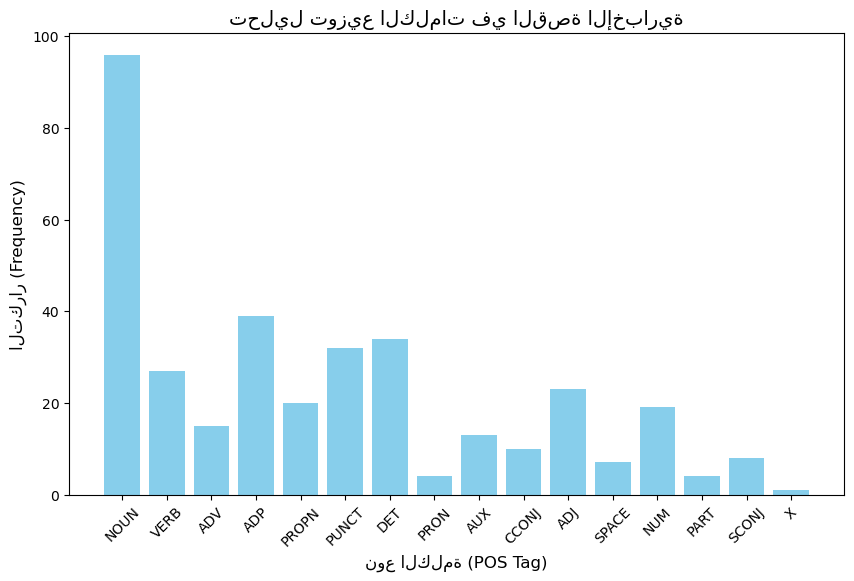

In [11]:
import matplotlib.pyplot as plt

# 1. تجهيز البيانات من نتائج الكود السابق
labels = []
values = []

for k, v in count.items():
    labels.append(doc.vocab[k].text) # تحويل الكود الرقمي إلى اسم (مثل NOUN)
    values.append(v)                 # التكرار (عدد الكلمات)

# 2. رسم المخطط البياني (Bar Chart)
plt.figure(figsize=(10, 6)) # تحديد حجم الصورة
plt.bar(labels, values, color='skyblue') # رسم الأعمدة بلون سماوي مريح

# 3. إضافة اللمسات الاحترافية (Labels & Title)
plt.xlabel('نوع الكلمة (POS Tag)', fontsize=12)
plt.ylabel('التكرار (Frequency)', fontsize=12)
plt.title('تحليل توزيع الكلمات في القصة الإخبارية', fontsize=14)
plt.xticks(rotation=45) # تدوير الأسماء قليلاً لتسهيل القراءة

# 4. عرض الرسم
plt.show()